In [231]:
import numpy as np
import matplotlib.pyplot as plt

In [232]:
def rectangle_window(n, N):
    return 1 if 0 <= n < N else 0

In [233]:
def Hann_window(n, N):
    return 0.5 * (1 - np.cos(2 * np.pi * n / (N)))

In [234]:
def fourier(f, window):
    N = f.size
    Fx = np.zeros_like(f, dtype=complex)
    freq = np.zeros_like(f)
    for k in range(N):
        for n in range(N):
            Fx[k] += f[n] * window(n, N) * np.exp(1j * (2 * np.pi / N) * k * n)
            freq[k] = 2*np.pi*k/(4*np.pi)
    return Fx, freq

In [235]:
a0 = 1
a1 = 0.002
w0 = 5.1
w1 = 5 * w0
N = 1000
n = 1000
T = 4 * np.pi * np.arange(n) / N

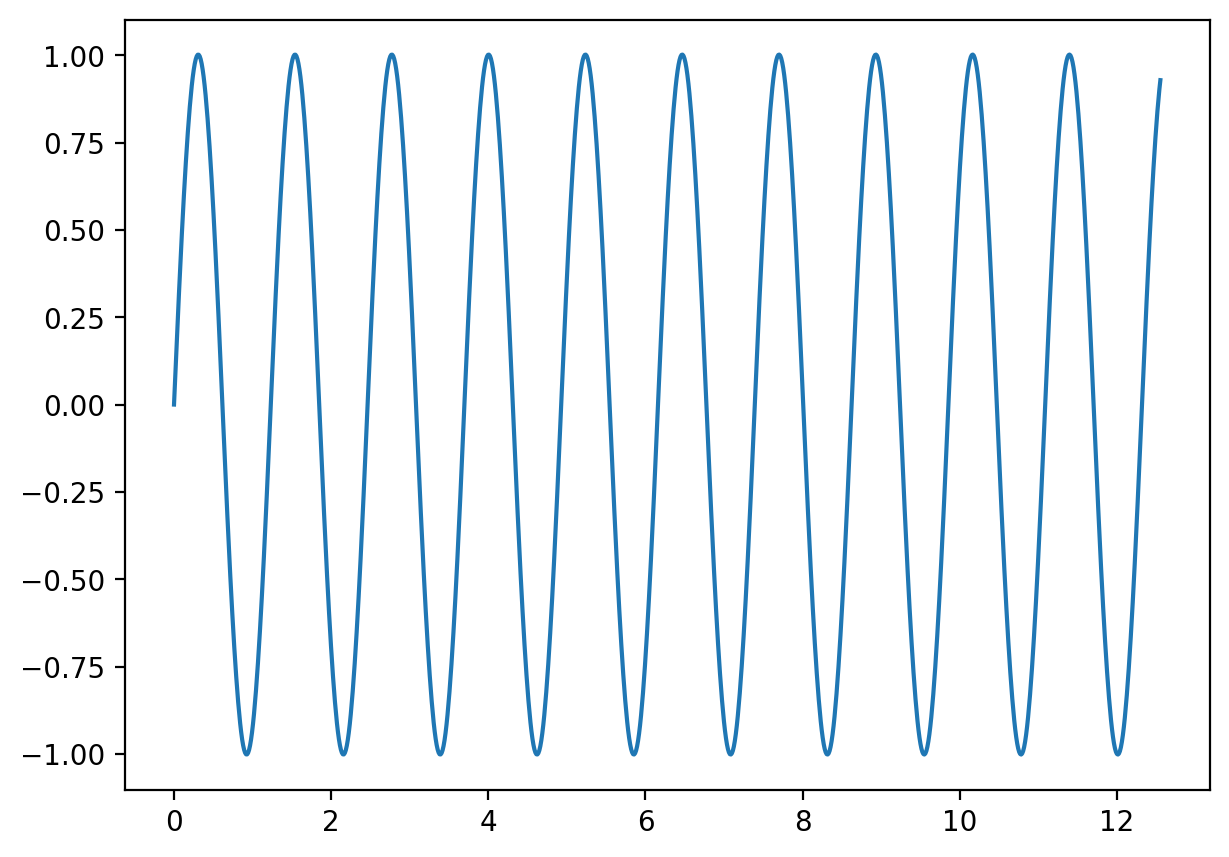

In [236]:
f = a0 * np.sin(w0 * T) + a1 * np.sin(w1 * T)
plt.figure(figsize=(7, 5), dpi=200)
plt.plot(T, f)
plt.show()

# Rectangle window

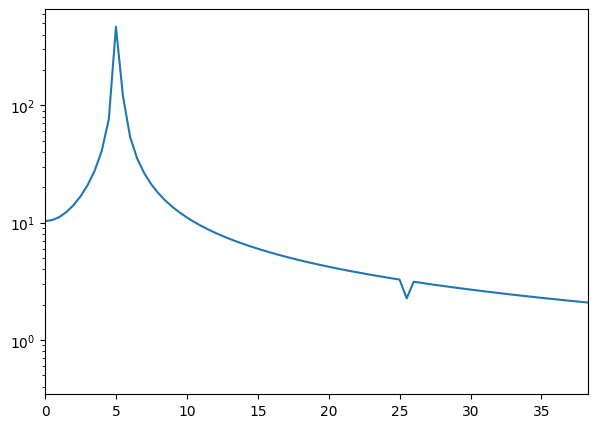

In [237]:
spectrum_1, freq = fourier(f, rectangle_window)
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(freq, np.abs(spectrum_1))
plt.xlim([0, w1 * 1.5])
plt.yscale('log')
plt.show()

# Hanning window

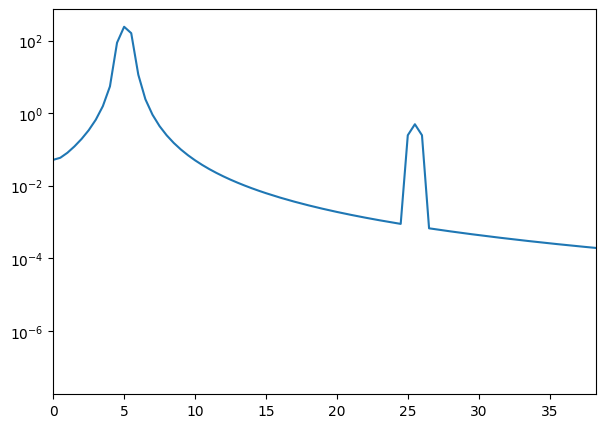

In [238]:
spectrum_2, freq_2 = fourier(f, Hann_window)
plt.figure(figsize=(7, 5), dpi=100)
plt.plot(freq_2, np.abs(spectrum_2))
plt.xlim([0, w1 * 1.5])
plt.yscale('log')
plt.show()